# Preliminary Analysis

In [1]:
#Load data
import pandas as pd

df = pd.read_csv("source_data.csv", sep = ",")

In [2]:
#Get dimensions and look at data head
print(df.shape)
df.head()

(7917, 12)


,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,origin_warehouse_code,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes,trip_created_date,trip_start_time,geofence_in_time,geofence_out_time
0,23297,1,11.0,11.0,C220,25001891,2,12.875800,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T11:02:59,2023-02-01T11:15:23
1,23297,2,16.0,27.0,C220,10015094,30,92.809133,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T12:22:55,2023-02-01T12:36:09.980
2,23298,1,14.0,14.0,C220,10003303,65,41.280700,2023-02-01,2023-02-01T10:52:08.158,2023-02-01T11:33:25,2023-02-01T11:56:15.964
3,23372,1,14.0,14.0,C220,10003303,100,17.953983,2023-02-01,2023-02-01T11:26:10.013,2023-02-01T11:44:07.252,2023-02-01T12:06:06.993
4,23595,1,18.0,18.0,C220,10013469,24,63.004467,2023-02-01,2023-02-01T13:18:07.732,2023-02-01T14:21:08,2023-02-01T14:35:58


In [3]:
#Get dataset structure, datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   trip_id                               7917 non-null   int64  
 1   drop_sequence                         7917 non-null   int64  
 2   distance_calculated                   7887 non-null   float64
 3   distance_covered_till_drop            7904 non-null   float64
 4   origin_warehouse_code                 7917 non-null   object 
 5   destination_warehouse_code            7917 non-null   int64  
 6   total_quantity                        7917 non-null   int64  
 7   actual_transit_time_from_cnf_minutes  7887 non-null   float64
 8   trip_created_date                     7917 non-null   object 
 9   trip_start_time                       7907 non-null   object 
 10  geofence_in_time                      7897 non-null   object 
 11  geofence_out_time

### Data Dictionary

|            **Column Name**           |                                       **Column Description**                                       |
|:------------------------------------:|:--------------------------------------------------------------------------------------------------:|
|                trip_id               |                                     Unique Identifier for trip                                     |
|             drop_sequence            |                        Drop Sequence of Milk Run of the      particular trip                       |
|          distance_calculated         |                                 distance from the Depot ( Origin )                                 |
|      distance_covered_till_drop      |                 distance covered from the Depot (      Origin ) to the Destination                 |
|         origin_warehouse_code        |                             Unique code for Origin      Depot/Warehouse                            |
|      destination_warehouse_code      |                                  Destination Dealer/Warehouse Code                                 |
|            total_quantity            |       Total Quantity of goods delivered to      particular Destination      Warehouse/Dealer       |
| actual_transit_time_from_cnf_minutes | Transit Time taken in minutes to be      delivered to particular Destination      Warehouse/Dealer |
|           trip_created_date          |                                              Trip Date                                             |
|            trip_start_time           |                                       Start Time of the trip                                       |
|           geofence_in_time           |                        Geofence In Time to the destination Warehouse/Dealer                        |
|           geofence_out_time          |                        Geofence Out Time to the destination Warehouse/Dealer                       |

# Data Preparation

## Dealing with datatypes

In [4]:
#Get column info, analyze datatypes and missing values
print(df.dtypes)

trip_id                                   int64
drop_sequence                             int64
distance_calculated                     float64
distance_covered_till_drop              float64
origin_warehouse_code                    object
destination_warehouse_code                int64
total_quantity                            int64
actual_transit_time_from_cnf_minutes    float64
trip_created_date                        object
trip_start_time                          object
geofence_in_time                         object
geofence_out_time                        object
dtype: object


In [5]:
df["trip_id"] = df["trip_id"].astype('category')
df["origin_warehouse_code"] = df["origin_warehouse_code"].astype('category')
df["destination_warehouse_code"] = df["destination_warehouse_code"].astype('category')

df["total_quantity"] = df["total_quantity"].astype('float')

df["trip_created_date"] = pd.to_datetime(df["trip_created_date"])
df["trip_start_time"] = pd.to_datetime(df["trip_start_time"])
df["geofence_in_time"] = pd.to_datetime(df["geofence_in_time"])
df["geofence_out_time"] = pd.to_datetime(df["geofence_out_time"])

In [6]:
#Confirm datatype changes
print(df.dtypes)

trip_id                                       category
drop_sequence                                    int64
distance_calculated                            float64
distance_covered_till_drop                     float64
origin_warehouse_code                         category
destination_warehouse_code                    category
total_quantity                                 float64
actual_transit_time_from_cnf_minutes           float64
trip_created_date                       datetime64[ns]
trip_start_time                         datetime64[ns]
geofence_in_time                        datetime64[ns]
geofence_out_time                       datetime64[ns]
dtype: object


## Dealing with Missing Data

In [7]:
#determine missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   trip_id                               7917 non-null   category      
 1   drop_sequence                         7917 non-null   int64         
 2   distance_calculated                   7887 non-null   float64       
 3   distance_covered_till_drop            7904 non-null   float64       
 4   origin_warehouse_code                 7917 non-null   category      
 5   destination_warehouse_code            7917 non-null   category      
 6   total_quantity                        7917 non-null   float64       
 7   actual_transit_time_from_cnf_minutes  7887 non-null   float64       
 8   trip_created_date                     7917 non-null   datetime64[ns]
 9   trip_start_time                       7907 non-null   datetime64[ns]
 10  

mention columns with missing data

In [8]:
#Get percentage values of missing data
print(f"Total Number of rows: {len(df)}")
print(f"Total number of null values: {df.isnull().sum().sum()}")

print(100*(df.isnull().sum())/len(df))

Total Number of rows: 7917
Total number of null values: 166
trip_id                                 0.000000
drop_sequence                           0.000000
distance_calculated                     0.378931
distance_covered_till_drop              0.164204
origin_warehouse_code                   0.000000
destination_warehouse_code              0.000000
total_quantity                          0.000000
actual_transit_time_from_cnf_minutes    0.378931
trip_created_date                       0.000000
trip_start_time                         0.126310
geofence_in_time                        0.252621
geofence_out_time                       0.795756
dtype: float64


Since less that 0.5% is missing in most cases, safe to remove. Time constraints mean that methods like exploration for randomness, and possibly imputation cannot be performed.

Geofence out time will have to be dealt with since it has the largest contingent of missing values. To potentially save ourself from removing unnecessary rows, especially if this column is unimportant to the model, we'll have to figure out a way to use the column with missing data.

See if correaltions with columns with missing data so we can remove rows with confidence.

<Axes: >

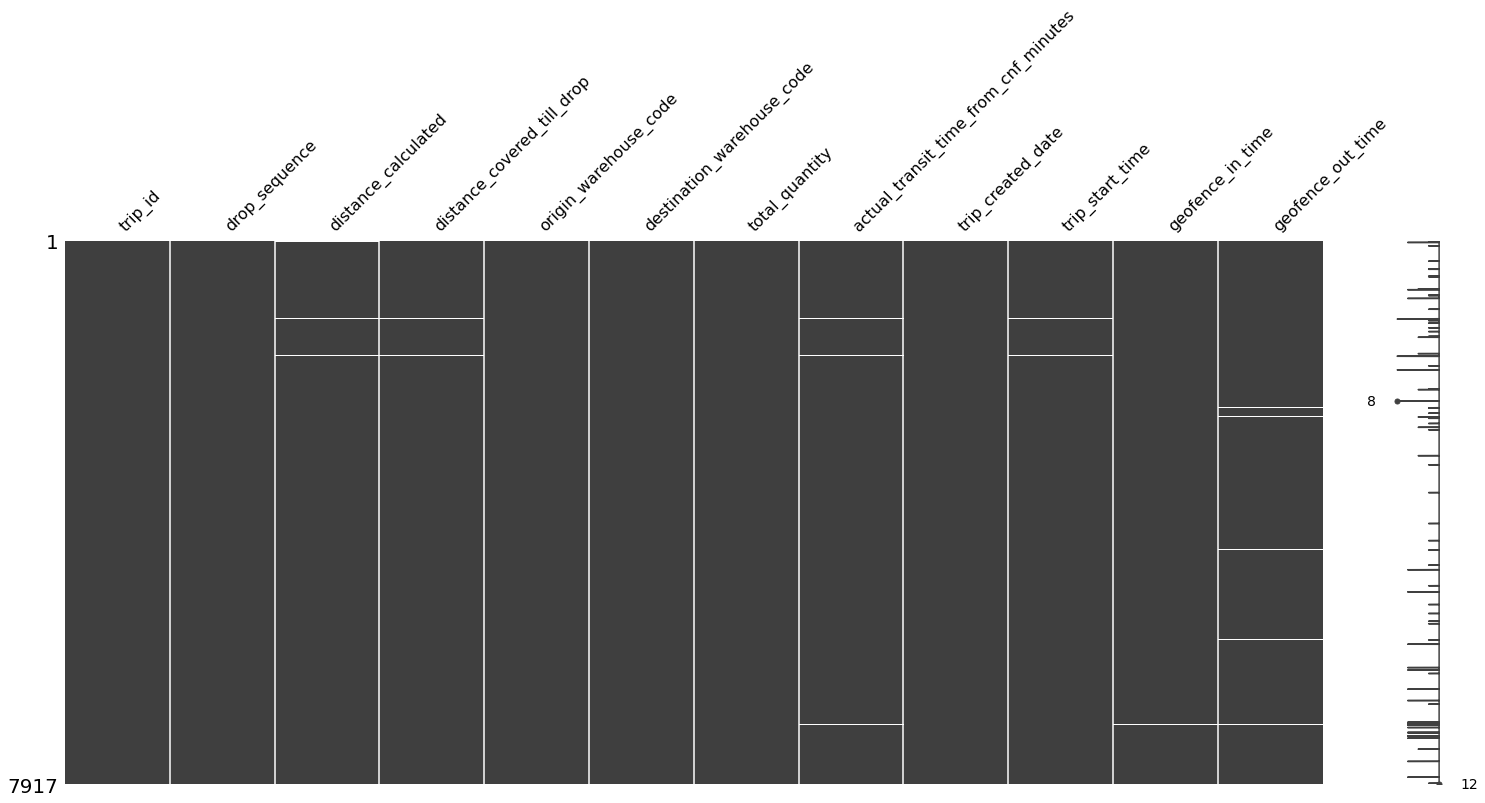

In [9]:
#visualize missing data for patterns
import missingno as msno

# msno.matrix(df, figsize=(10, 150))
msno.matrix(df)

- target missing nothing can be done but remove. Nice to establish pattern with other columns. Perhaps trip didn't happen.
- Keep in mind missingno doesn't display everything since scale is uncertain. As you have seen before, some rows have missing values which don't really appear in the figure. You can try commented out code for better scale.
- However, apart from that, geofence out time is missing for certain rows. Not necessarily important as a row, but nice to have. Possibly impute it by adding mean stationary time at destination to geofence in time.

In [10]:
#Remove rows with any Null values
df = df.dropna(how='any',axis=0) 

## Dealing with Outliers

Conduct tests for simple outliers. (i.e. distance and time cannot be 0 or negative)
Check for very high or low values.
No time for in multivariate outlier detection or in depth analysis.

In [11]:
print(len(df[df["drop_sequence"] <= 0]))
print(len(df[df["distance_calculated"] <= 0]))
print(len(df[df["distance_covered_till_drop"] <= 0]))
print(len(df[df["total_quantity"] <= 0]))
print(len(df[df["actual_transit_time_from_cnf_minutes"] <= 0]))

0
425
46
3
45


In [12]:
#Only save data points with numeric value greater than 0

df = df[df["drop_sequence"] > 0]
df = df[df["distance_calculated"] > 0]
df = df[df["distance_covered_till_drop"] > 0]
df = df[df["total_quantity"] > 0]
df = df[df["actual_transit_time_from_cnf_minutes"] > 0]

In [13]:
#Drop values on either side of interquatile range
cols = ['drop_sequence', 'distance_calculated','distance_covered_till_drop', 'total_quantity', 'actual_transit_time_from_cnf_minutes']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
print(len(df))

6156


# Basic statistics and Cardinality

## Descriptive statistics

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
drop_sequence,6156.0,3.966537,2.609957,1.000000,2.000000,3.000000,6.000000,12.0000
distance_calculated,6156.0,5.398635,4.661921,1.000000,2.000000,4.000000,7.000000,19.0000
distance_covered_till_drop,6156.0,20.154483,13.155102,1.000000,10.000000,18.000000,29.000000,62.0000
total_quantity,6156.0,8.734893,6.970721,1.000000,4.000000,7.000000,12.000000,31.0000
actual_transit_time_from_cnf_minutes,6156.0,104.031281,65.319121,0.019417,52.026633,98.752883,149.091333,305.8469


## Understanding cardinality

Check percentage of unique values for categorical.
See unique values for understanding.

In [16]:
print(df['origin_warehouse_code'].value_counts())

C220    6156
Name: origin_warehouse_code, dtype: int64


We can see that the origin warehouse is the same across all datapoints.

In [17]:
print(df['destination_warehouse_code'].nunique())

134


We can see that the destination warehouse spans 134 different values.

In [18]:
print(df['destination_warehouse_code'].value_counts())

10004333    189
10013857    182
10013792    172
25001972    169
10002797    169
           ... 
25003515      0
10009653      0
25003677      0
25002004      0
25003877      0
Name: destination_warehouse_code, Length: 140, dtype: int64


# Feature Engineering

## Splitting time


Subsequent drops in the sequence uses the previous drop's geofence out time to get accurate readings of trip hour.

In [19]:
df[["year", "month", "m_day", "hour"]] = df["geofence_out_time"].shift(1).apply(lambda x: x.timetuple()[0:4] if pd.notna(x) else (2023, 2, 1, 0)).tolist()
df.loc[(df.drop_sequence == 1), ["year", "month", "m_day", "hour"]] = df.loc[(df.drop_sequence == 1), "trip_start_time"].apply(lambda x: x.timetuple()[0:4]).tolist()

df["w_day"] = df["geofence_out_time"].shift(1).apply(lambda x: x.weekday() if pd.notna(x) else 0)
df.loc[(df.drop_sequence == 1), "w_day"] = df.loc[(df.drop_sequence == 1), "trip_start_time"].apply(lambda x: x.weekday())

## Univariate Analysis

### Target: actual_transit_time

In [20]:
df["actual_transit_time_from_cnf_minutes"].describe()

count    6156.000000
mean      104.031281
std        65.319121
min         0.019417
25%        52.026633
50%        98.752883
75%       149.091333
max       305.846900
Name: actual_transit_time_from_cnf_minutes, dtype: float64

(0.019416667, 305.8469)

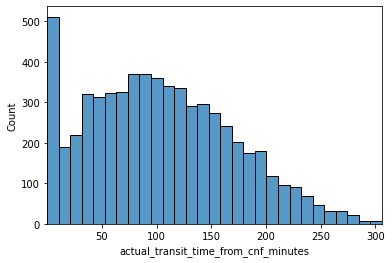

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x = 'actual_transit_time_from_cnf_minutes')
plt.xlim(df["actual_transit_time_from_cnf_minutes"].min(), df["actual_transit_time_from_cnf_minutes"].max())

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.17111e-05] [loc=104.031 scale=65.314]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 8.83584e-05] [loc=0.019 scale=104.012]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 8.83584e-05] [loc=-8589934591.981 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [0.13 sec] [RSS: 5.48749e-05] [loc=100.831 scale=58.291]
[distfit] >INFO> [t         ] [0.80 sec] [RSS: 4.17178e-05] [loc=104.035 scale=65.311]
[distfit] >INFO> [genextreme] [0.62 sec] [RSS: 3.92562e-05] [loc=76.826 scale=58.382]
[distfit] >INFO> [gamma     ] [0.14 sec] [RSS: 4.16404e-05] [loc=-39.152 scale=32.988]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 4.05137e-05] [loc=-163.010 scale=259.136]
[distfit] >INFO> [beta      ] [0.23 sec] [RSS: 2.89646e-05] [loc=0.006 scale=307.497]
[distfit] >INFO> [uniform   ] [0.01 sec] [RSS: 0.000126252] [loc=0.019 scale=305.827]
[distfit] >INFO> [loggamma  ] [0.15 sec] [RSS: 4.17844e-05] [loc=-17

(<Figure size 360x216 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=1.17946, b=2.36291, loc=0.00616211, scale=307.497)'}, xlabel='Values', ylabel='Frequency'>)

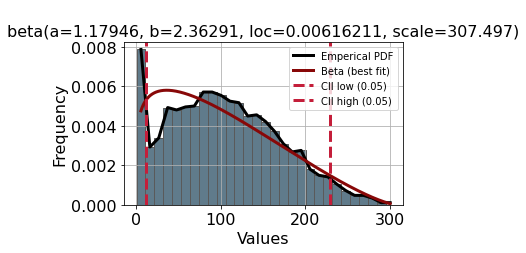

In [22]:
from distfit import distfit
import numpy as np

dist = distfit()
dist.fit_transform(df["actual_transit_time_from_cnf_minutes"], 0)
dist.plot(figsize=(5,3))

We can observe that the target conforms to a beta distribution with a = 1.18 and b = 2.36.

### Drop Sequence

(1.0, 12.0)

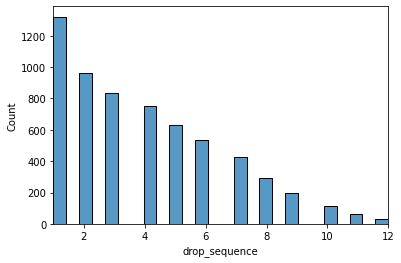

In [24]:
sns.histplot(df, x = 'drop_sequence')
plt.xlim(df["drop_sequence"].min(), df["drop_sequence"].max())

Sequence drops are concentrated in the lower values.

### distance_calculated

----------------------

Represents the distance travelled in each trip.

In [26]:
df["distance_calculated"].describe()

count    6156.000000
mean        5.398635
std         4.661921
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        19.000000
Name: distance_calculated, dtype: float64

(1.0, 19.0)

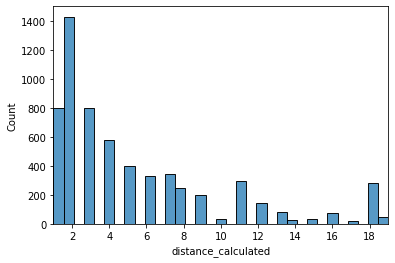

In [27]:
sns.histplot(df, x = 'distance_calculated')
plt.xlim(df["distance_calculated"].min(), df["distance_calculated"].max())

### distance_covered_till_drop

Represents the distance travelled in each journey.

In [28]:
df["distance_covered_till_drop"].describe()

count    6156.000000
mean       20.154483
std        13.155102
min         1.000000
25%        10.000000
50%        18.000000
75%        29.000000
max        62.000000
Name: distance_covered_till_drop, dtype: float64

(1.0, 62.0)

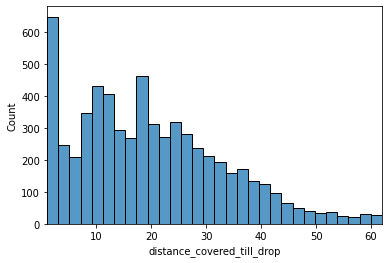

In [29]:
sns.histplot(df, x = 'distance_covered_till_drop')
plt.xlim(df["distance_covered_till_drop"].min(), df["distance_covered_till_drop"].max())

### total_quantity

In [32]:
df["total_quantity"].describe()

count    6156.000000
mean        8.734893
std         6.970721
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        31.000000
Name: total_quantity, dtype: float64

(1.0, 31.0)

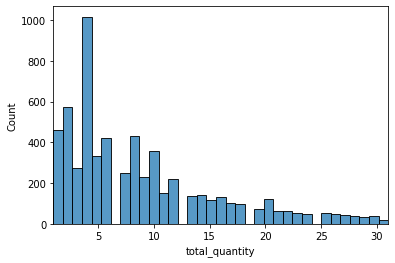

In [35]:
sns.histplot(df, x = 'total_quantity')
plt.xlim(df["total_quantity"].min(), df["total_quantity"].max())

### Day of Month

In [ ]:
df[["year", "month", "m_day", "hour"]]

In [36]:
df["m_day"].describe()

count    6156.000000
mean       15.657895
std         8.641572
min         1.000000
25%         8.000000
50%        15.000000
75%        23.000000
max        31.000000
Name: m_day, dtype: float64

(1.0, 31.0)

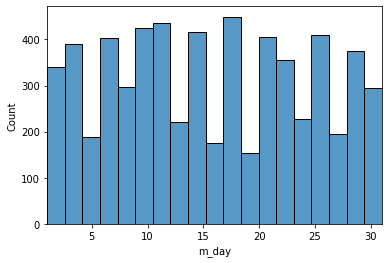

In [37]:
sns.histplot(df, x = 'm_day')
plt.xlim(df["m_day"].min(), df["m_day"].max())

Can observe the drop when approaching the weekend.

### Day of Week

In [46]:
df['day_name'] = df['trip_start_time'].dt.day_name()

<Axes: xlabel='day_name', ylabel='Count'>

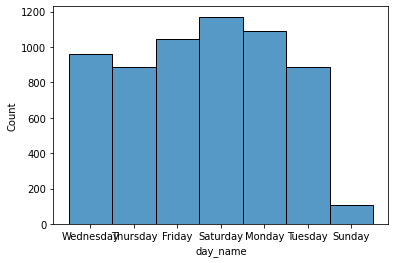

In [50]:
sns.histplot(df, x = 'day_name')

### Hour

In [38]:
df["hour"].describe()

count    6156.000000
mean       14.890026
std         2.222788
min         0.000000
25%        13.000000
50%        15.000000
75%        17.000000
max        23.000000
Name: hour, dtype: float64

(0.0, 23.0)

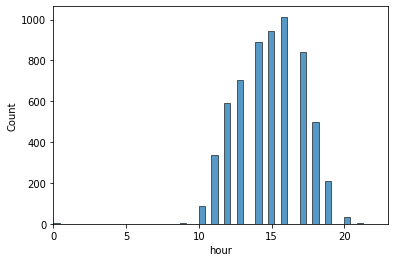

In [39]:
sns.histplot(df, x = 'hour')
plt.xlim(df["hour"].min(), df["hour"].max())

### Month

(2.0, 9.0)

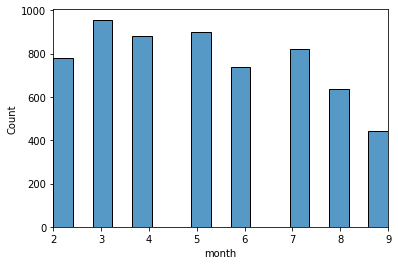

In [40]:
sns.histplot(df, x = 'month')
plt.xlim(df["month"].min(), df["month"].max())

# Bivariate Analysis

### Between distance and time

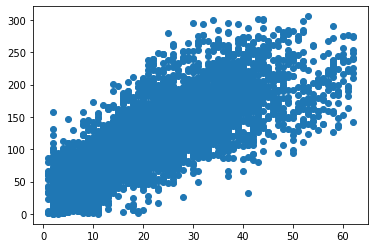

In [52]:
plt.scatter(df["distance_covered_till_drop"], df["actual_transit_time_from_cnf_minutes"])
plt.show()

- From the plot, we can see that there is a positive correlation between the two variables, meaning that as the distance increases, the transit time also increases. This makes sense, as we would expect longer distances to take more time to travel. However, the correlation is not perfect, as there is some variation and scatter in the data points. This means that there are other factors that affect the transit time, such as traffic, weather, road conditions, etc.

- We can also see that there is a slight curve in the relationship, meaning that the rate of change of transit time is not constant across different distances. It seems that the transit time increases faster for shorter distances than for longer distances. This could be because of congestion or speed limits in urban areas, or because of diminishing returns in fuel efficiency or vehicle performance.

### Analyzing trend of actual_transit_time

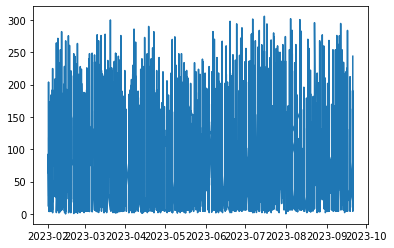

In [55]:
plt.plot(df["trip_start_time"], df["actual_transit_time_from_cnf_minutes"])

No appreciable pattern can be derived from the line graph.

### Analyzing trend of distance_covered

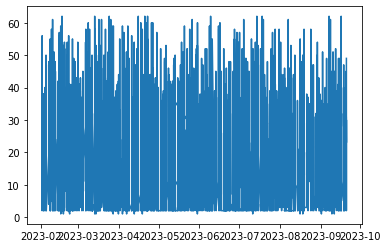

In [56]:
plt.plot(df["trip_start_time"], df["distance_covered_till_drop"])

No appreciable pattern can be derived from the line graph.

### Between quantity and time

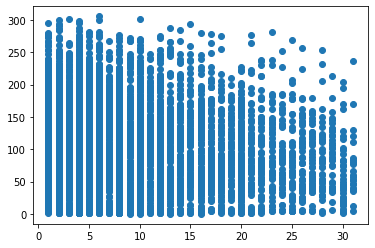

In [57]:
plt.scatter(df["total_quantity"], df["actual_transit_time_from_cnf_minutes"])
plt.show()

No viable correlation can be determined between total_quantity and actual_transit_time.

# Correlation Analysis

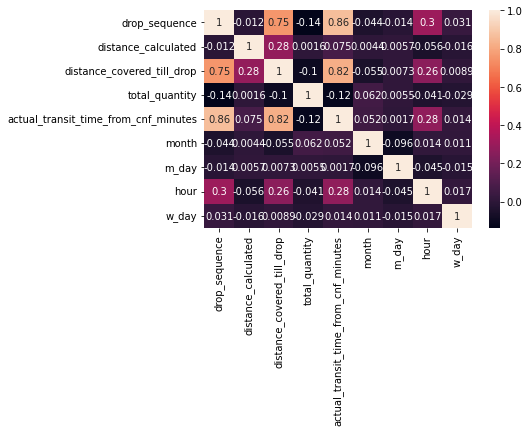

In [60]:
corr_matrix = df.drop(['year'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

- The variable that has a strong positive correlation with actual_transit_time is distance_covered_till_drop, with a correlation coefficient of 0.87. 
- This means that as the distance from the depot increases, the transit time also increases. This is expected, as longer distances usually take more time to travel.
- Another variable which has a strong positive correlation with actual_transit_time is drop sequence.
- This is also to be expected, as drop_sequence increases, the distance too generally increases. We can observe this trend from the high correlation between drop_Sequence and distance_covered.
- The next highest correlation is at 0.28, which is between actual_transit_time and hour. This too is understandable given the large number of trips occuring later in the day.
- This also means most of the other variables have little to no explanatory scope with each other and with the target. This will have to be confirmed via feature importance in modeling.